In [52]:
import tellurium as te
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [20]:
def find_model(start, filename):
    for root, dirs, files in os.walk(start):
        if filename in files:
            return os.path.join(root, filename)

In [21]:
start_dir = 'ChemE 546/Project'
file_model = 'multi_enzyme_model.txt'
file_path = find_model(start_dir, file_model)

In [22]:
print(file_path)

None


In [24]:
'''
# Load file and convert to SBML (if not already)
def load_model(filename, filetype): 
    """ Input the filename/path of the file, and its syntax.
    Output declares whether file was successfully loaded or not"""
    
    model_ant = "multi_enzyme_model.txt"
    with open(model_ant, "r") as file:
        model_content = file.read()

    try:
        model_sbml = te.antimonyToSBML(model_content)
        model_load = te.loadSBMLModel(model_sbml)
        print("Successfully loaded file.")
    except Exception as e:
        print("Could not load file.", e)
'''

Successfully loaded file


In [38]:
# Load file and convert to SBML
# If file is in SBML, function will still load the model

def load_model(filename, filetype): 
    """ 
    filename: .txt, .csv, biomodels website
    filetype: ant, sbml
    
    Input the filename/path of the file, and its syntax.
    Output declares whether file was successfully loaded or not
    """
    model_ant = filename
    with open(model_ant, "r") as file:
        model_content = file.read()
    if filetype=='antimony':
        try:
            model_sbml = te.antimonyToSBML(model_content)
            model_load = te.loadSBMLModel(model_sbml)
            print(f"Successfully converted file '{filename}' from {filetype} to SBML and loaded.")
        except Exception as e:
            print("Could not load file.", e)
    else: 
        try:
            model_load = te.loadSBMLModel(model_content)
            print(f"Successfully loaded SBML file {filename}.")
        except Exception as e:
            print("Could not load SBML file.", e)
    return model_load

In [39]:
load_model('multi_enzyme_model.txt', 'antimony')

Successfully converted file 'multi_enzyme_model.txt' from antimony to SBML and loaded.


<roadrunner.RoadRunner() { this = 00000240F0D2CEA0 }>

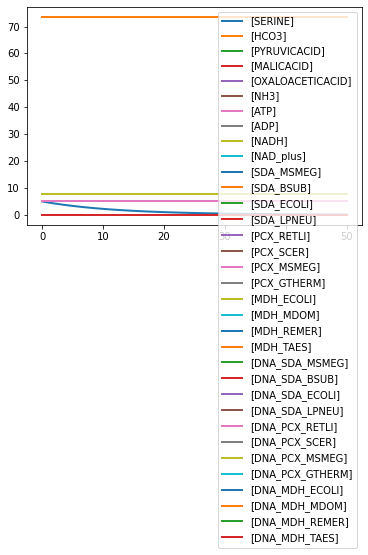

In [58]:
r = te.loadSBMLModel(model_load)
result = r.simulate(0, 50, 101) 
r.plot()

In [59]:
# Extract time and species data
time = result[:, 0]
species_data = result[:, 1:]
# Convert to DataFrame
columns = ['Time'] + [f'Species_{i}' for i in range(species_data.shape[1])]
df = pd.DataFrame(data=result, columns=columns)
# Save DataFrame to Excel
df.to_excel('simulation_data.xlsx', index=False)

In [60]:
df

,Time,Species_0,Species_1,Species_2,Species_3,Species_4,Species_5,Species_6,Species_7,Species_8,...,Species_24,Species_25,Species_26,Species_27,Species_28,Species_29,Species_30,Species_31,Species_32,Species_33
0,0.0,4.930950,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,4.732897,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,4.542742,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,4.360213,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,4.185040,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,48.0,0.096317,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,48.5,0.092449,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,49.0,0.088735,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,49.5,0.085171,73.5294,0.0,0.0,0.0,0.0,4.93095,0.0,7.53695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.


  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: pygments
    Found existing installation: Pygments 2.10.0
    Uninstalling Pygments-2.10.0:
      Successfully uninstalled Pygments-2.10.0
